In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
import data_import
import data_preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [7]:
data=data_import.load_data()
data=data_preprocessing.data_preprocess(data)
data.head()

2025-11-12 22:07:35,918 - data_import - DEBUG - Data loaded from C:\MSML\SEM 1\ML\ML Projects\Project 2\Feature-Selection-and-Dimensionality-Reduction\data\pollution_dataset.csv
2025-11-12 22:07:35,929 - data_preprocess - DEBUG - Data Preprocessing completed


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,1
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,1
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,1
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [8]:

X=data.drop(columns='Air Quality')
y=data['Air Quality']
print(X.shape)
print(y.shape)

(5000, 9)
(5000,)


In [9]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Air Quality, dtype: int64

In [10]:
feature_names= np.array(X.columns.tolist())
feature_names

array(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density'],
      dtype='<U29')

In [11]:
def univeriate(i):
    number_features=i
    #UNiveriate feature selection 
    selector=SelectKBest(chi2,k=number_features)   
    X_new = selector.fit_transform(X,y)
    X_new_features_mask = selector.get_support()
    X_new_feature_names = feature_names[X_new_features_mask]
    print('\nSelected', number_features, 'features using univariate feature selection:\n',X_new_feature_names)
    return X_new


In [ ]:
def feature_imp_score(i):
    # Feature selection by importance score
    classifier=RandomForestClassifier(n_estimators=100,random_state=21)
    classifier.fit(X,y)
    feature_imp_scores=pd.DataFrame({'fea_imp_score': classifier.feature_importances_})
    feature_imp_scores['Features']=feature_names
    feature_imp_scores_sorted = feature_imp_scores.sort_values(by=feature_imp_scores.columns[0], ascending=False)
    top_k = feature_imp_scores_sorted['Features'].head(i).tolist()         # top k rows (names + scores)
    print('\nSelected :',i,'features using feature importance score:\n',top_k)
    #Visualise the feature importance score
    plt.figure(figsize=(8,5))
    plt.bar(feature_imp_scores_sorted["Features"], feature_imp_scores_sorted["fea_imp_score"])
    plt.xlabel("Features")
    plt.ylabel("Feature Importance Score")
    plt.title("Feature Importance Plot")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    model=SelectFromModel(classifier,prefit=True)
    X_new=model.transform(X)
    X_new_k=X_new[:i,:]
    return X_new_k
    


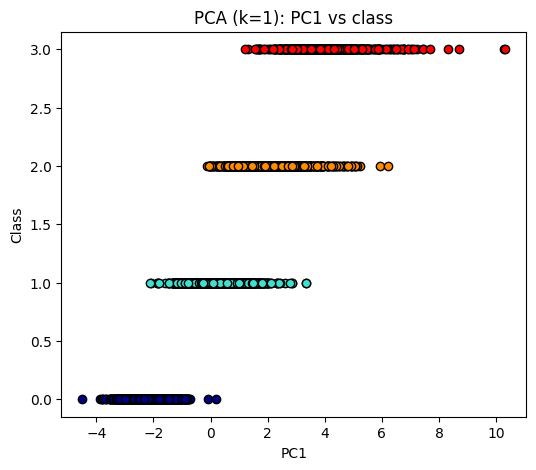

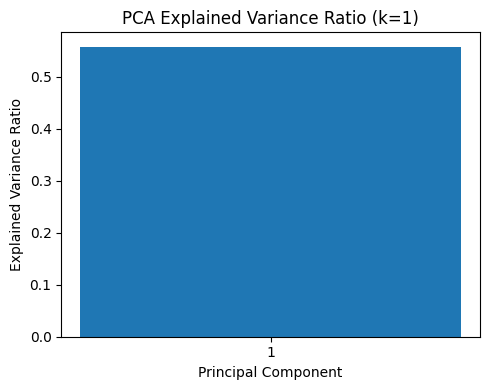

(5000, 1)


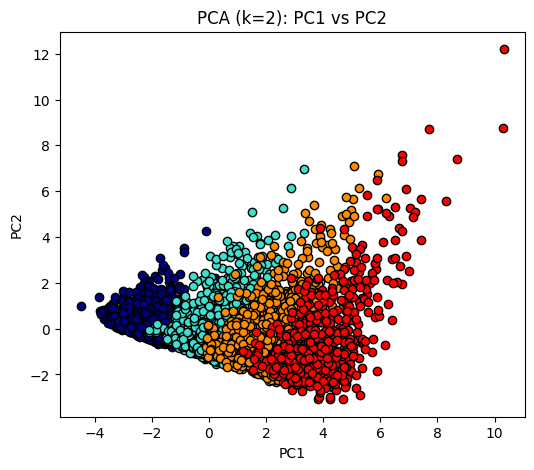

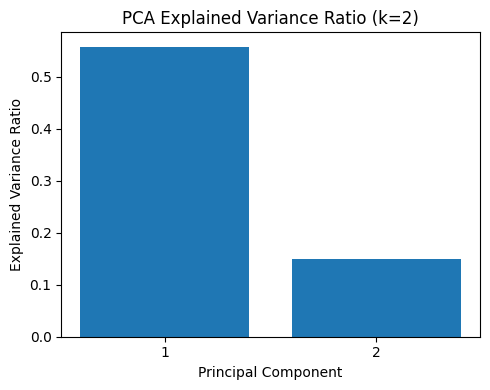

(5000, 2)


<Figure size 600x500 with 0 Axes>

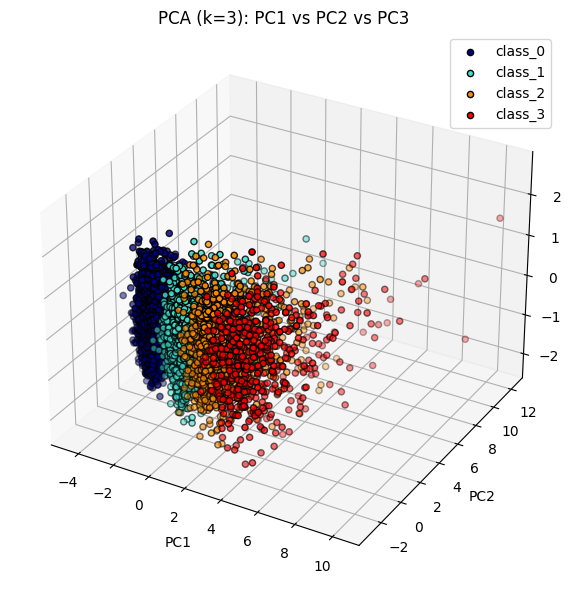

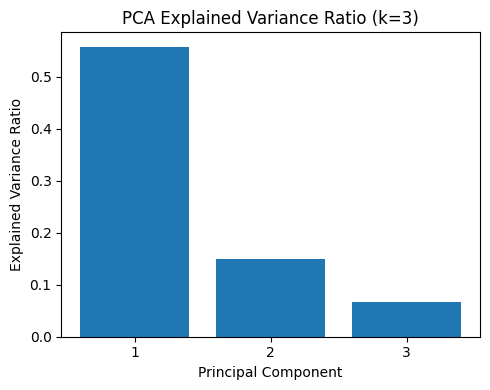

(5000, 3)


In [ ]:


def pca(i):
    nComps=i
    X_scaled = StandardScaler().fit_transform(X)
    pca = PCA(n_components=nComps)
    pca.fit(X_scaled)
    X_pca_k=pca.transform(X_scaled)
    var_ratio = pca.explained_variance_ratio_
    plt.figure(figsize=(6, 5)) 
    classes = np.unique(y)
    colors = ['navy', 'turquoise', 'darkorange', 'red']

    if k == 1:
        # 1D case: PC1 vs class (stacked by class on y-axis)
        for cls, color in zip(classes, colors):
            idx = (y == cls)
            plt.scatter(
                X_pca_k[idx, 0],
                np.zeros(np.sum(idx)) + cls,
                label=f'class_{cls}',
                edgecolors='k',
                color=color
            )
        plt.xlabel('PC1')
        plt.ylabel('Class')
        plt.title('PCA (k=1): PC1 vs class')

    elif k==2:
        # 2D case: PC1 vs PC2 colored by class (like your screenshot)
        for cls, color in zip(classes, colors):
            idx = (y == cls)
            plt.scatter(
                X_pca_k[idx, 0],
                X_pca_k[idx, 1],
                label=f'class_{cls}',
                edgecolors='k',
                color=color
            )
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title(f'PCA (k={k}): PC1 vs PC2')
    else:
        fig = plt.figure(figsize=(7, 6))
        ax = fig.add_subplot(111, projection='3d')
        for cls, color in zip(classes, colors):
            idx = (y == cls)
            ax.scatter(
                X_pca_k[idx, 0],
                X_pca_k[idx, 1],
                X_pca_k[idx, 2],
                label=f'class_{cls}',
                edgecolors='k',
                color=color
            )
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.set_title('PCA (k=3): PC1 vs PC2 vs PC3')
        ax.legend()
        plt.tight_layout()
        plt.show()



    # variance ration visualization 
    plt.figure(figsize=(5, 4))
    components = np.arange(1, len(var_ratio) + 1)
    plt.bar(components, var_ratio)
    plt.xticks(components)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'PCA Explained Variance Ratio (k={k})')
    plt.tight_layout()
    plt.show()

    return X_pca_k
 
# call for k = 1, 2, 3
for k in [1, 2, 3]:
    data=pca(k)
    print(data.shape)



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def lda(i):
    nComps = i
    X_scaled = StandardScaler().fit_transform(X)
    lda = LDA(n_components=nComps)
    X_lda_k = lda.fit_transform(X_scaled, y)
    var_ratio = lda.explained_variance_ratio_

    plt.figure(figsize=(6, 5))
    classes = np.unique(y)
    colors = ['navy', 'turquoise', 'darkorange', 'red']

    if k == 1:
        for cls, color in zip(classes, colors):
            idx = (y == cls)
            plt.scatter(
                X_lda_k[idx, 0],
                np.zeros(np.sum(idx)) + cls,
                label=f'class_{cls}',
                edgecolors='k',
                color=color
            )
        plt.xlabel('LD1')
        plt.ylabel('Class')
        plt.title('LDA (k=1): LD1 vs class')

    elif k == 2:
        for cls, color in zip(classes, colors):
            idx = (y == cls)
            plt.scatter(
                X_lda_k[idx, 0],
                X_lda_k[idx, 1],
                label=f'class_{cls}',
                edgecolors='k',
                color=color
            )
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        plt.title(f'LDA (k={k}): LD1 vs LD2')
    else:
        fig = plt.figure(figsize=(7, 6))
        ax = fig.add_subplot(111, projection='3d')
        for cls, color in zip(classes, colors):
            idx = (y == cls)
            ax.scatter(
                X_lda_k[idx, 0],
                X_lda_k[idx, 1],
                X_lda_k[idx, 2],
                label=f'class_{cls}',
                edgecolors='k',
                color=color
            )
        ax.set_xlabel('LD1')
        ax.set_ylabel('LD2')
        ax.set_zlabel('LD3')
        ax.set_title('LDA (k=3): LD1 vs LD2 vs LD3')
        ax.legend()
        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(5, 4))
    components = np.arange(1, len(var_ratio) + 1)
    plt.bar(components, var_ratio)
    plt.xticks(components)
    plt.xlabel('Linear Discriminant')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'LDA Explained Variance Ratio (k={k})')
    plt.tight_layout()
    plt.show()

    return X_lda_k

for k in [1, 2, 3]:
    data = lda(k)
    print(data.shape)


In [14]:
K=[1,2,3]

for i in K:
    number_features=i
    #UNiveriate feature selection 
    selector=SelectKBest(chi2,k=number_features)   
    X_new = selector.fit_transform(X,y)
    X_new_features_mask = selector.get_support()
    X_new_feature_names = feature_names[X_new_features_mask]
    print('\nSelected', number_features, 'features using univariate feature selection:\n',X_new_feature_names)
    
  

    





Selected 1 features using univariate feature selection:
 ['Population_Density']

Selected 2 features using univariate feature selection:
 ['PM10' 'Population_Density']

Selected 3 features using univariate feature selection:
 ['PM2.5' 'PM10' 'Population_Density']


In [15]:
X_new_df=pd.DataFrame(X_new)
X_new_df.head()

,0,1,2
0,5.2,17.9,319.0
1,2.3,12.2,611.0
2,26.7,33.8,619.0
3,6.1,6.3,551.0
4,6.9,16.0,303.0
